# Model Deployement

This Notebook preapre and deploy a docker image in AWS.

## Model
The model is a simple linear regression based on fake data abour salary.
Source comes from mockaroo.com

#
Prepare and train a model for a docker installation

In [4]:
# import some libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
data = pd.read_csv('data/salary.csv')
data.shape

(1000, 8)

In [3]:
data.sample(4)

,id,title,first_name,last_name,birthdate,level_school,graduated,salary
145,146,Dr,Alyda,Grocutt,5/16/1964,6,False,13484.16
698,699,Mr,Revkah,Yurocjhin,4/16/1987,2,False,12224.16
42,43,Dr,Nadiya,Teas,10/18/1968,4,True,22996.60
436,437,Dr,Sibeal,Cromett,4/16/1961,4,False,14495.04


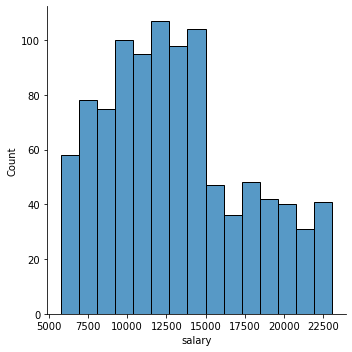

In [5]:
# plot a distribution of salary, target variable
sns.displot(data, x="salary")